In [3]:
################ Library imports ################
import numpy as np
import math as math

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

In [4]:
# Keep always the same random numbers
np.random.seed(1)

In [5]:
def f(x):
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 8.]).T

# Observations
y = f(X).ravel()

In [6]:
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [7]:
# Instantiate a Gaussian Process model
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

In [8]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

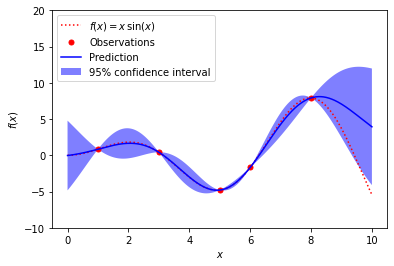

In [9]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

In [13]:
t = np.arange(0.1, 20, 0.1)

y1 = math.sin(t)/t
y2 = sin(t)*exp(-t)
p1, p2 = plot(t, y1, t, y2)

# Texto en la gráfica en coordenadas (x,y)
texto1 = text(2, 0.6, r'$\frac{\sin(x)}{x}$', fontsize=20)
texto2 = text(13, 0.2, r'$\sin(x) \cdot e^{-x}$', fontsize=16)

# Añado una malla al gráfico
grid()

title('Representacion de dos funciones')
xlabel('Tiempo / s')
ylabel('Amplitud / cm')

show()

TypeError: only size-1 arrays can be converted to Python scalars